In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1. Determine the «survival» rates independently for men and women for age groups; 

0-4,	5-9,	10-14,	15-19, 	20-24, 	25-29,	30-34,	35-39,	40-44,	45-49,	50-54,	55-59,	60-64,	65-69,	70-74,	75-79,	80-84,	85-89,	90-94,	95-99, and	100+ according to 2000-2005 population data from the UN (NIGERIA)

Survival Rate (SR) = Population at the end of the age groupb (PEG) / Population at the beginning of the age group (PBG)

i.e SR = PEG/PBG

Input data: Population estimates for each age group for female, and male from 2000 to 2005
Output data: Survival rates for each age group for females and males
Parameters: None, as we only using the given demographic data to compute survival rates

In [4]:
# Source: https://population.un.org/wpp/Download/Standard/Population/

# Input data for the Nigerian female and male population estimates

import pandas as pd

female_data = pd.read_csv('female_population_2000_to_2005_nigera.csv', thousands=' ')
male_data = pd.read_csv('male_population_2000_to_2005_nigeira.csv', thousands=' ')


In [5]:
female_data

,Year,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100+
0,2000,10552,8483,7258,6547,5626,4528,3667,3098,2602,...,1528,1201,882,590,341,156,51,11,1,0
1,2001,10869,8728,7406,6660,5799,4709,3778,3175,2667,...,1566,1230,904,604,349,160,52,11,1,0
2,2002,11218,8975,7577,6761,5961,4894,3904,3252,2734,...,1601,1259,927,618,357,163,53,11,1,0
3,2003,11592,9220,7772,6855,6110,5085,4041,3332,2804,...,1627,1289,952,633,365,167,55,11,1,0
4,2004,11968,9479,7982,6960,6245,5273,4194,3417,2875,...,1639,1321,976,649,373,171,56,12,1,0
5,2005,12332,9765,8206,7084,6364,5447,4359,3510,2946,...,1655,1354,1001,665,382,175,58,12,1,0


In [6]:
male_data

,Year,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100+
0,2000,10871,8705,7423,6682,5730,4588,3703,3116,2593,...,1492,1141,814,526,289,122,34,6,0,0
1,2001,11197,8960,7585,6797,5904,4773,3818,3197,2661,...,1530,1170,835,539,296,125,36,6,0,0
2,2002,11555,9216,7771,6902,6069,4962,3948,3279,2733,...,1565,1199,858,553,304,129,37,6,0,0
3,2003,11938,9467,7980,7002,6219,5155,4089,3362,2807,...,1588,1229,882,567,311,132,38,6,0,0
4,2004,12321,9730,8205,7116,6355,5344,4244,3450,2883,...,1595,1261,906,582,320,136,39,6,1,0
5,2005,12692,10025,8443,7252,6474,5517,4412,3545,2958,...,1603,1295,930,598,328,140,41,7,1,0


Survival Rate (SR) = Population at the end of the age groupb (PEG) / Population at the beginning of the age group (PBG) i.e. SR = PEG/PBG

In [7]:
def calculate_survival_rate_2000_to_2005(df):
    sr_2000_to_2005 = pd.DataFrame(columns=[f"SR_{i}-{i+4}" for i in range(5, 100, 5)], index=[0])

    for i in range(2, df.shape[1] - 1):
        with np.errstate(divide='ignore', invalid='ignore'):
            rate = np.divide(df.iloc[-1, i], df.iloc[0, i - 1])
            if np.isnan(rate):
                rate = 0
        sr_2000_to_2005.iloc[0, i - 2] = rate

    return sr_2000_to_2005

female_survival_rates_2000_to_2005 = calculate_survival_rate_2000_to_2005(female_data)
male_survival_rates_2000_to_2005 = calculate_survival_rate_2000_to_2005(male_data)


In [8]:
female_survival_rates_2000_to_2005

,SR_5-9,SR_10-14,SR_15-19,SR_20-24,SR_25-29,SR_30-34,SR_35-39,SR_40-44,SR_45-49,SR_50-54,SR_55-59,SR_60-64,SR_65-69,SR_70-74,SR_75-79,SR_80-84,SR_85-89,SR_90-94,SR_95-99
0,0.925417,0.967346,0.976026,0.972048,0.968183,0.962677,0.957186,0.950936,0.946195,0.937098,0.918424,0.886126,0.833472,0.753968,0.647458,0.513196,0.371795,0.235294,0.090909


In [9]:
male_survival_rates_2000_to_2005

,SR_5-9,SR_10-14,SR_15-19,SR_20-24,SR_25-29,SR_30-34,SR_35-39,SR_40-44,SR_45-49,SR_50-54,SR_55-59,SR_60-64,SR_65-69,SR_70-74,SR_75-79,SR_80-84,SR_85-89,SR_90-94,SR_95-99
0,0.922178,0.969902,0.976963,0.968872,0.962827,0.961639,0.957332,0.949294,0.938681,0.924193,0.901575,0.867962,0.815074,0.734644,0.623574,0.484429,0.336066,0.205882,0.166667


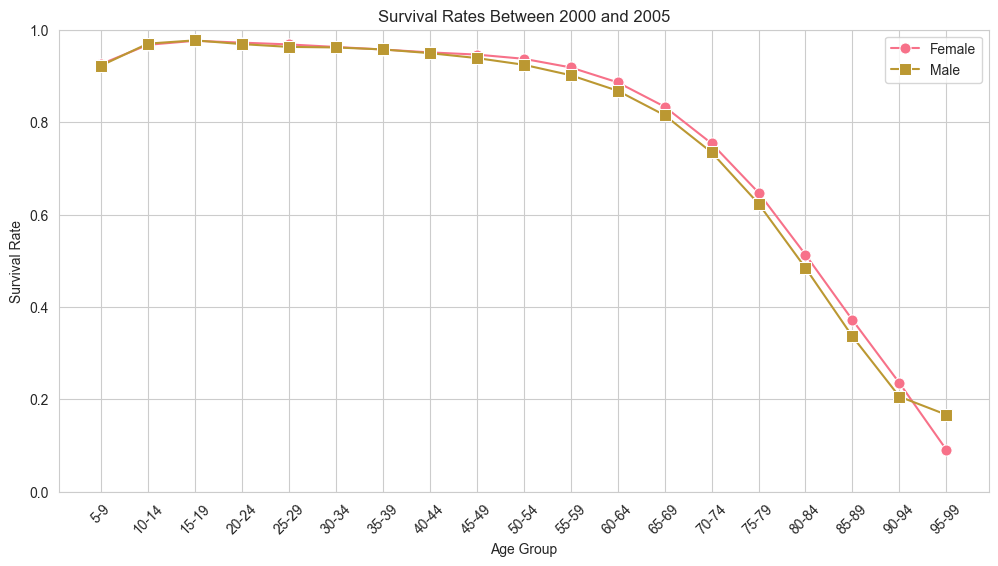

In [10]:
# Set up the seaborn style
sns.set_style("whitegrid")
sns.set_palette("husl")

# Set up the plot
plt.figure(figsize=(12, 6))
plt.title("Survival Rates Between 2000 and 2005")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")

# Plot the data
age_groups = [f"{i}-{i+4}" for i in range(5, 100, 5)]
sns.lineplot(x=age_groups, y=female_survival_rates_2000_to_2005.iloc[0], label="Female", linestyle='-', marker='o', markersize=8)
sns.lineplot(x=age_groups, y=male_survival_rates_2000_to_2005.iloc[0], label="Male", linestyle='-', marker='s', markersize=8)

# Customize the plot
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Show the plot
plt.show()


2. Determine the fertility rate for women in the age category 20-24, 25-29,	30-34, and	35-39

The Age-Specific Fertility Rate (ASFR) is expressed as the number of live births per 1,000 women in a specific age group during a specific year

Age-Specific Fertility rate (ASFR) = (number of live births in an age group) / (number of women in the same age group) * 1000

Input: number of live births and female population data
Output: fertility rate for each age group (20-24, 25-29, 30-34, and 35-39)

First, let's create a DataFrame with the number of live births for each age group and year:

In [11]:
# Data Source
# https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/EXCEL_FILES/3_Fertility/WPP2022_FERT_F04_BIRTHS_BY_5-YEAR_AGE_GROUPS_OF_MOTHER.xlsx

births_data = pd.read_csv('births_2000_to_2005_nigeria.csv', thousands=' ')


In [12]:
births_data

,Year,20-24,25-29,30-34,35-39
0,2000,1349,1221,909,586
1,2001,1361,1274,950,600
2,2002,1390,1313,972,608
3,2003,1394,1351,1013,611
4,2004,1433,1401,1047,622
5,2005,1466,1445,1082,637


Next, let's extract the number of women in each age group for each year from the female population data:

In [13]:
female_age_groups_df = female_data[["Year", "20-24", "25-29", "30-34", "35-39"]]

In [14]:
female_age_groups_df

,Year,20-24,25-29,30-34,35-39
0,2000,5626,4528,3667,3098
1,2001,5799,4709,3778,3175
2,2002,5961,4894,3904,3252
3,2003,6110,5085,4041,3332
4,2004,6245,5273,4194,3417
5,2005,6364,5447,4359,3510


Now, let's calculate the ASFR for each age group and year:

In [15]:
def calculate_asfr(births_df, female_age_groups_df):
    asfr_data = []

    for index, row in births_df.iterrows():
        year = row["Year"]
        asfr_row = [year]

        for age_group in ["20-24", "25-29", "30-34", "35-39"]:
            births = row[age_group]
            female_population = female_age_groups_df.loc[female_age_groups_df["Year"] == year, age_group].iloc[0]
            asfr = round((births / female_population) * 1000, 2)
            asfr_row.append(asfr)

        asfr_data.append(asfr_row)

    asfr_df = pd.DataFrame(asfr_data, columns=["Year", "20-24", "25-29", "30-34", "35-39"])
    return asfr_df


In [16]:
asfr_df = calculate_asfr(births_data, female_age_groups_df)


In [17]:
asfr_df

,Year,20-24,25-29,30-34,35-39
0,2000,239.78,269.66,247.89,189.15
1,2001,234.70,270.55,251.46,188.98
2,2002,233.18,268.29,248.98,186.96
3,2003,228.15,265.68,250.68,183.37
4,2004,229.46,265.69,249.64,182.03
5,2005,230.36,265.28,248.22,181.48


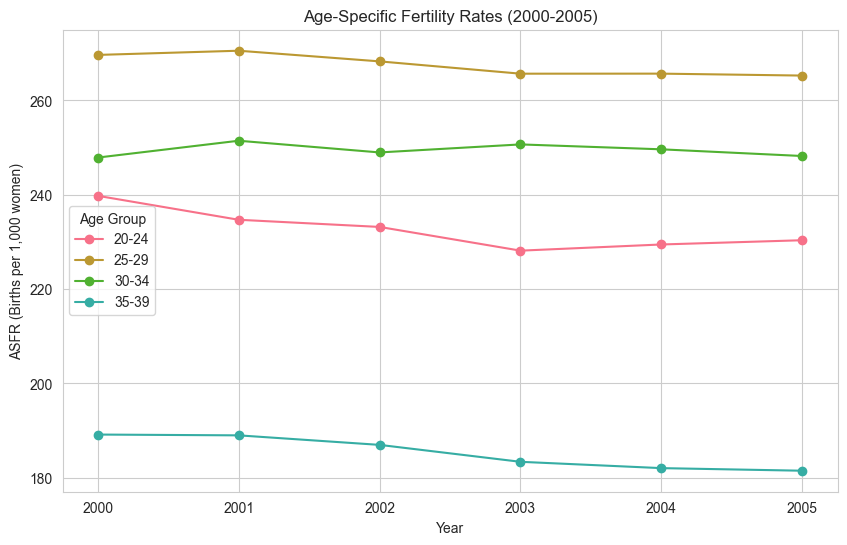

In [18]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the ASFR data for each age group
for col in asfr_df.columns[1:]:
    plt.plot(asfr_df['Year'], asfr_df[col], marker='o', label=col)

# Set axis labels and title
plt.xlabel('Year')
plt.ylabel('ASFR (Births per 1,000 women)')
plt.title('Age-Specific Fertility Rates (2000-2005)')

# Customize the legend
plt.legend(title="Age Group")

# Display the plot
plt.show()


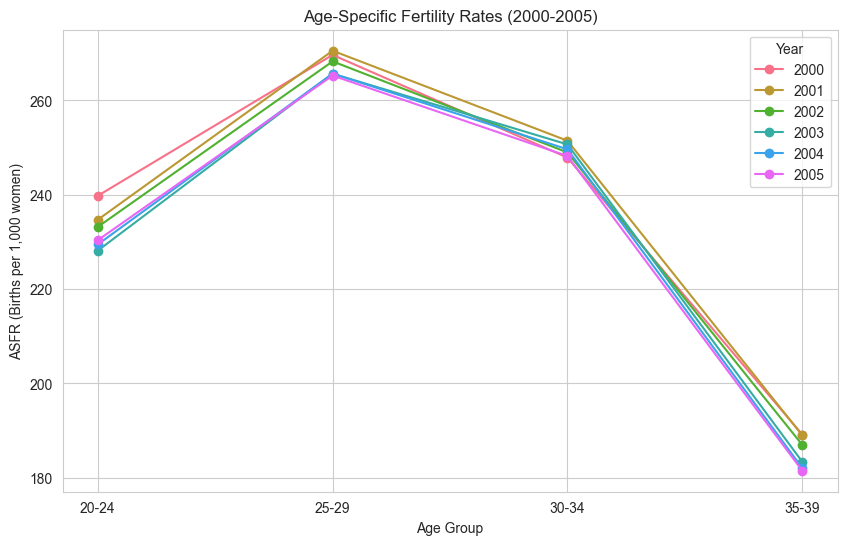

In [19]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the ASFR data for each year
for i, year in enumerate(asfr_df['Year']):
    plt.plot(asfr_df.columns[1:], asfr_df.iloc[i, 1:], marker='o', label=str(year))

# Set axis labels and title
plt.xlabel('Age Group')
plt.ylabel('ASFR (Births per 1,000 women)')
plt.title('Age-Specific Fertility Rates (2000-2005)')

# Customize the legend
plt.legend(title="Year")

# Display the plot
plt.show()


2. In our next task, we Calculate boys/girls ratio for newborn children.

boys/girls ratio = (number of newborn boys) / (number of newborn girls)

Input data: number of newborn boys and girls in each year
Output data: boys/girls ratio for each year

We will use the previously defined female_data and male_data for the number of newborns in each year. 
The number of newborns can be found in the "0-4" age group. 

In [20]:
def calculate_boys_to_girls_ratio(female_data, male_data):
    boys_to_girls_ratios = []

    for year in female_data["Year"]:
        newborn_boys = male_data.loc[male_data["Year"] == year, "0-4"].iloc[0]
        newborn_girls = female_data.loc[female_data["Year"] == year, "0-4"].iloc[0]

        boys_to_girls_ratio = newborn_boys / newborn_girls
        boys_to_girls_ratios.append([year, boys_to_girls_ratio])

    boys_to_girls_ratios_df = pd.DataFrame(boys_to_girls_ratios, columns=["Year", "Boys_to_Girls_Ratio"])
    return boys_to_girls_ratios_df

boys_to_girls_ratios_df = calculate_boys_to_girls_ratio(female_data, male_data)


In [21]:
boys_to_girls_ratios_df

,Year,Boys_to_Girls_Ratio
0,2000,1.030231
1,2001,1.030178
2,2002,1.030041
3,2003,1.029848
4,2004,1.029495
5,2005,1.029192


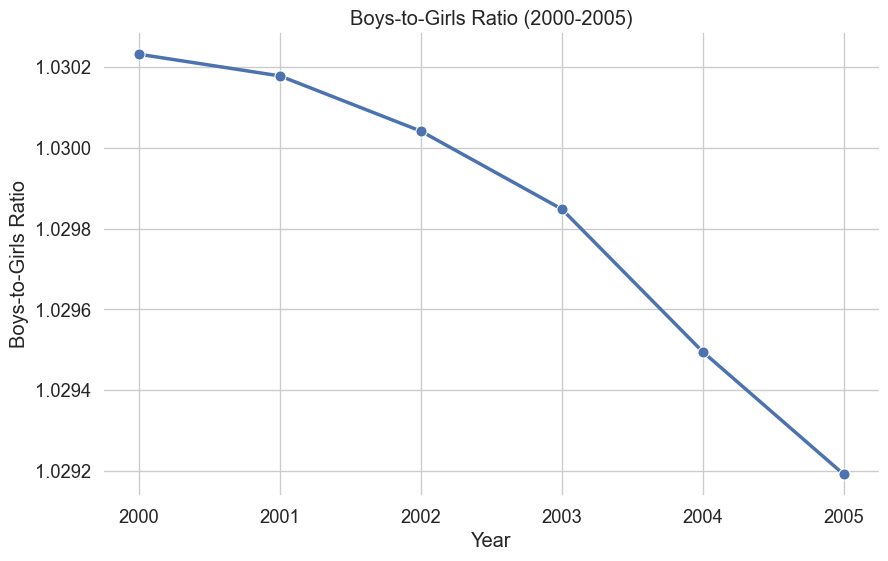

In [22]:
import seaborn as sns

def plot_boys_to_girls_ratios_seaborn(df):
    sns.set(style='whitegrid', font_scale=1.2)
    plt.figure(figsize=(10, 6))

    ax = sns.lineplot(data=df, x='Year', y='Boys_to_Girls_Ratio', marker='o', markersize=8, linewidth=2.5)

    ax.set(title='Boys-to-Girls Ratio (2000-2005)', xlabel='Year', ylabel='Boys-to-Girls Ratio')
    sns.despine(left=True, bottom=True)

    plt.show()

plot_boys_to_girls_ratios_seaborn(boys_to_girls_ratios_df)


4. Predict the change in the country's population and demographic profile for 100 years and compare with existing predictions!

In [103]:
!pip3 install xlrd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 921.3 kB/s eta 0:00:00a 0:00:01


In [242]:
filename = "age_data.xls"

sheets = pd.ExcelFile(filename).sheet_names

both_1950_data = pd.read_excel(filename, header=6, sheet_name=sheets[0])
both_2010_data = pd.read_excel(filename, header=6, sheet_name=sheets[1])
m_1950_data = pd.read_excel(filename, header=6, sheet_name=sheets[3])
m_2010_data = pd.read_excel(filename, header=6, sheet_name=sheets[4])
f_1950_data = pd.read_excel(filename, header=6, sheet_name=sheets[6])
f_2010_data = pd.read_excel(filename, header=6, sheet_name=sheets[7])


In [243]:
def filtered_dataset(dataset, country_code = 566):
    return dataset[dataset['Country code'] == country_code]\
            .drop(columns = ['Index', 'Variant','Major area, region, country or area*','Notes', 'Country code'])\
            .rename(columns = {'Reference date (as of 1 July)': 'Year'})\
            .set_index('Year')

In [244]:
both_1950 = filtered_dataset(both_1950_data)
both_2010 = filtered_dataset(both_2010_data)
m_1950 = filtered_dataset(m_1950_data)
m_2010 = filtered_dataset(m_2010_data)
f_1950 = filtered_dataset(f_1950_data)
f_2010 = filtered_dataset(f_2010_data)

In [245]:
both_1950

,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,...,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
Year,,,,,,,,,,,,,,,,,,,,,
1950,5476.400,4397.150,3796.060,3295.530,2865.020,2487.200,2132.720,1780.730,1512.020,1280.870,...,929.330,695.710,478.200,291.570,145.480,64.321,-,-,-,-
1955,6559.498,4754.909,4194.862,3661.738,3159.712,2724.308,2352.728,2002.973,1656.819,1392.329,...,1006.190,782.447,542.635,328.302,164.969,74.194,-,-,-,-
1960,7357.623,5747.280,4548.898,4054.385,3518.213,3012.049,2584.238,2216.730,1870.450,1531.905,...,1030.968,853.585,616.629,378.263,189.975,86.622,-,-,-,-
1965,8265.085,6505.304,5513.648,4405.160,3903.564,3362.051,2865.086,2442.711,2077.706,1736.467,...,1132.129,881.370,679.717,436.450,223.809,102.843,-,-,-,-
1970,9345.081,7372.673,6256.337,5346.122,4243.926,3732.656,3200.579,2712.765,2296.034,1935.509,...,1258.030,975.244,709.365,488.647,264.149,124.539,-,-,-,-
1975,10707.805,8413.879,7111.894,6079.904,5164.039,4070.445,3565.468,3041.835,2560.281,2148.486,...,1440.130,1092.219,793.349,518.050,302.477,152.055,-,-,-,-
1980,12519.216,9779.885,8191.717,7010.980,6022.645,5117.223,4037.988,3492.510,2927.756,2437.651,...,1632.952,1262.515,899.011,588.169,327.368,182.639,-,-,-,-
1985,14819.258,11403.398,9442.258,7928.146,6699.557,5695.283,4814.619,3793.661,3283.937,2736.233,...,1830.837,1434.358,1044.219,671.445,375.074,210.551,-,-,-,-
1990,16900.950,13618.560,11070.038,9214.166,7681.095,6440.670,5455.668,4595.850,3602.269,3096.619,...,2057.544,1616.561,1193.830,785.918,432.673,244.535,-,-,-,-


In [246]:
m_2010

,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,...,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
Year,,,,,,,,,,,,,,,,,,,,,
2010,12067.225,10584.035,9436.278,8499.778,7313.211,6018.194,4621.902,3566.870,2836.132,2344.342,...,1611.623,1185.744,907.890,603.978,343.757,153.816,47.139,8.581,0.767,0.034
2015,12527.926,11277.974,10274.289,9237.671,8240.738,6953.448,5615.048,4260.258,3274.150,2600.002,...,1772.241,1413.770,987.268,690.958,397.804,179.201,56.517,10.750,1.067,0.046
2020,12660.108,11822.466,10986.559,10075.059,8977.680,7870.943,6524.470,5207.958,3934.705,3018.771,...,1936.607,1564.431,1186.547,760.190,462.092,212.030,67.815,13.363,1.391,0.066
2025,12583.970,12053.834,11566.966,10794.782,9813.727,8609.364,7430.015,6092.503,4842.055,3650.796,...,2172.436,1721.347,1323.713,924.264,517.241,251.942,82.692,16.636,1.802,0.090
2030,12520.461,12073.531,11836.448,11387.382,10538.774,9447.144,8171.301,6985.664,5705.324,4524.354,...,2554.354,1945.254,1469.344,1042.923,639.341,288.564,101.301,21.056,2.338,0.122
2035,12515.761,12087.678,11890.803,11672.532,11140.861,10182.988,9014.156,7730.326,6584.875,5365.726,...,3128.757,2303.562,1674.539,1170.863,732.309,364.399,119.362,26.700,3.074,0.164
2040,12492.116,12144.827,11933.263,11743.175,11440.959,10802.918,9766.178,8579.904,7332.604,6231.017,...,3924.759,2839.352,1998.911,1348.549,834.146,425.552,154.633,32.453,4.034,0.223
2045,12361.311,12175.827,12013.381,11800.054,11530.004,11129.426,10411.411,9350.029,8187.799,6979.036,...,4707.245,3583.435,2480.722,1626.016,973.841,493.406,184.851,43.248,5.057,0.302
2050,12111.989,12094.623,12063.900,11892.429,11604.435,11249.695,10774.919,10022.963,8973.727,7835.864,...,5523.918,4321.286,3151.835,2034.728,1188.455,585.327,218.875,53.021,6.928,0.389


In [247]:
def plot_population_stacked_bar_chart(data, title="Population by Age Group and Year"):
    fig, ax = plt.subplots(figsize=(12, 8))

    # Create a stacked bar chart
    data.plot(kind='bar', stacked=True, ax=ax)

    # Set labels and title
    ax.set_xlabel("Year")
    ax.set_ylabel("Population")
    ax.set_title(title)

    # Set x-axis tick labels
    ax.set_xticklabels(data.index, rotation=45)

    # Add legend
    ax.legend(title="Age Groups", bbox_to_anchor=(1, 1))

    # Show the plot
    plt.show()




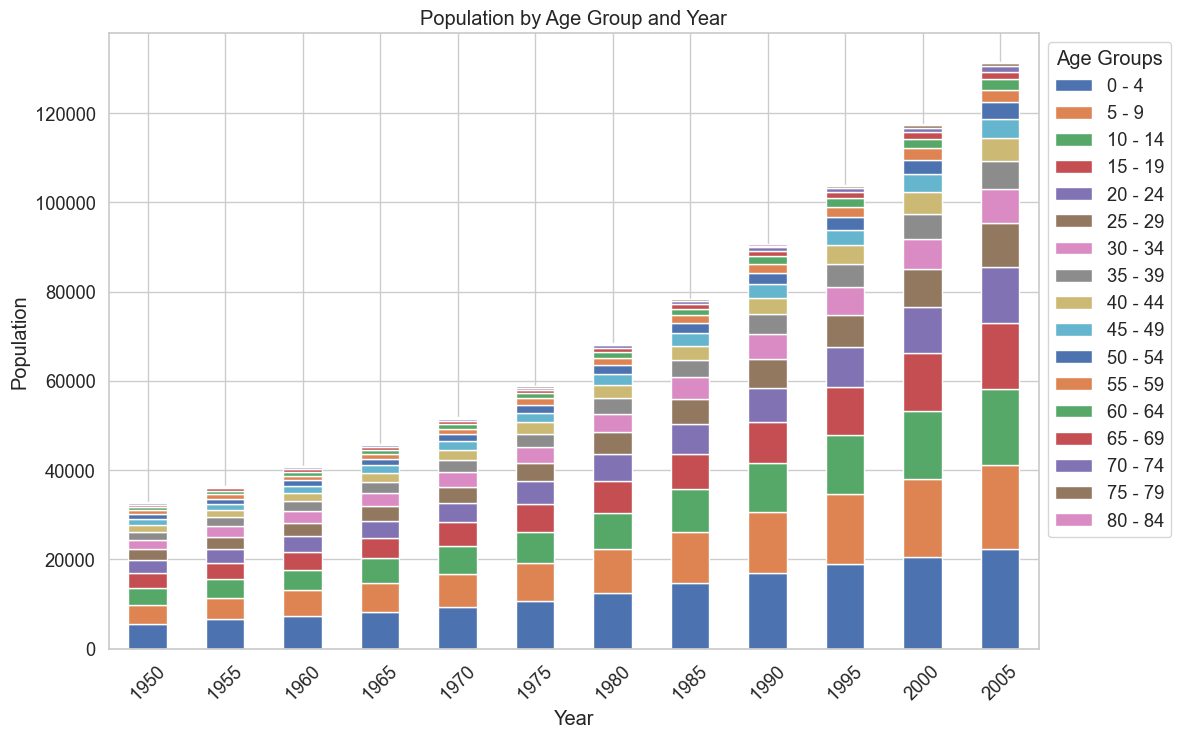

In [248]:
#'both_1950' dataset
plot_population_stacked_bar_chart(both_1950)

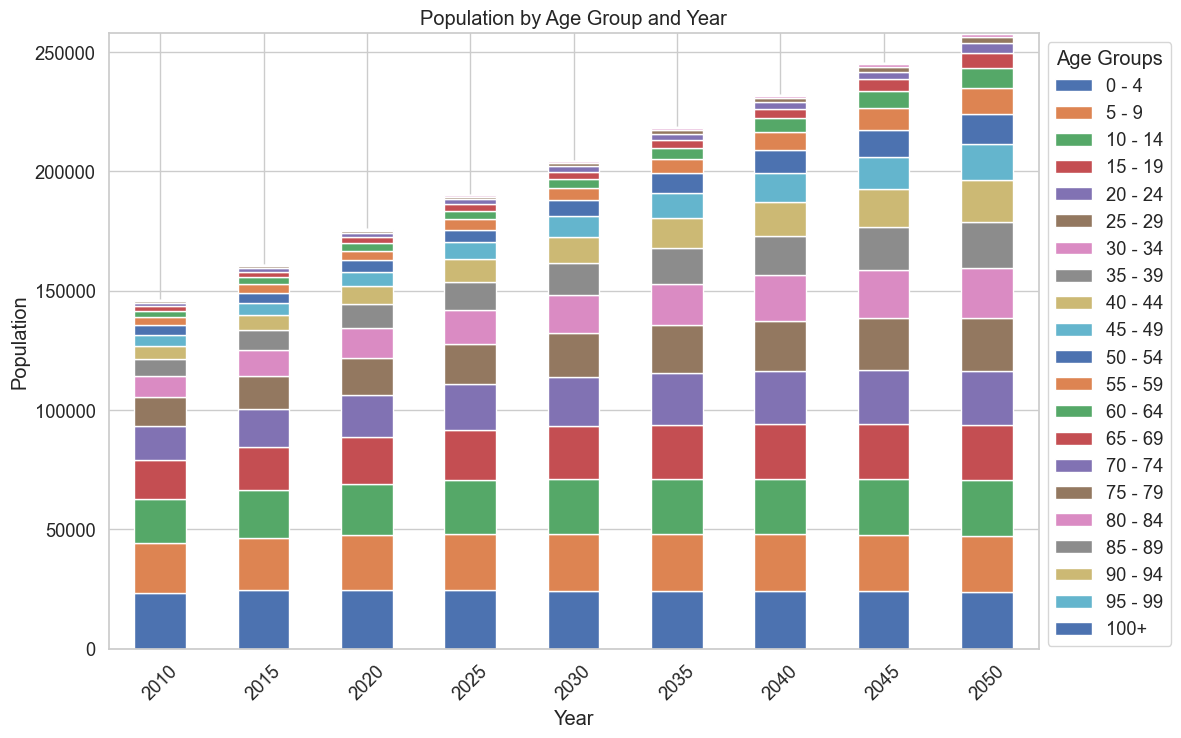

In [250]:
#'both_1950' dataset
plot_population_stacked_bar_chart(both_2010)

In [252]:
def plot_population_by_age_group(data, title="Population by Age Group and Year"):
    fig, ax = plt.subplots(figsize=(12, 8))

    # Transpose the dataset to have age groups as index and years as columns
    data_transposed = data.T

    # Create a line chart
    data_transposed.plot(kind='line', ax=ax)

    # Set labels and title
    ax.set_xlabel("Age Group")
    ax.set_ylabel("Population")
    ax.set_title(title)

    # Set x-axis tick locations and labels
    ax.set_xticks(range(len(data_transposed.index)))
    ax.set_xticklabels(data_transposed.index, rotation=45)

    # Add legend with an increased size to accommodate all years
    ax.legend(title="Year", bbox_to_anchor=(1.1, 1))

    # Show the plot
    plt.show()


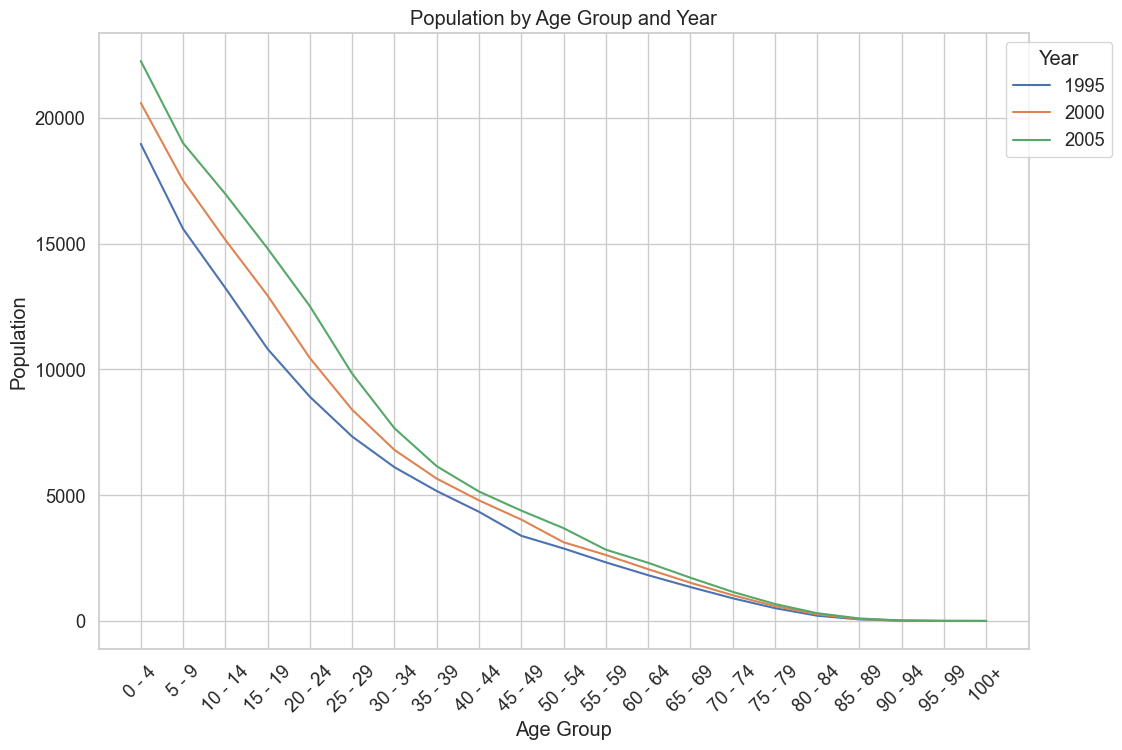

In [253]:
plot_population_by_age_group(both_1950)

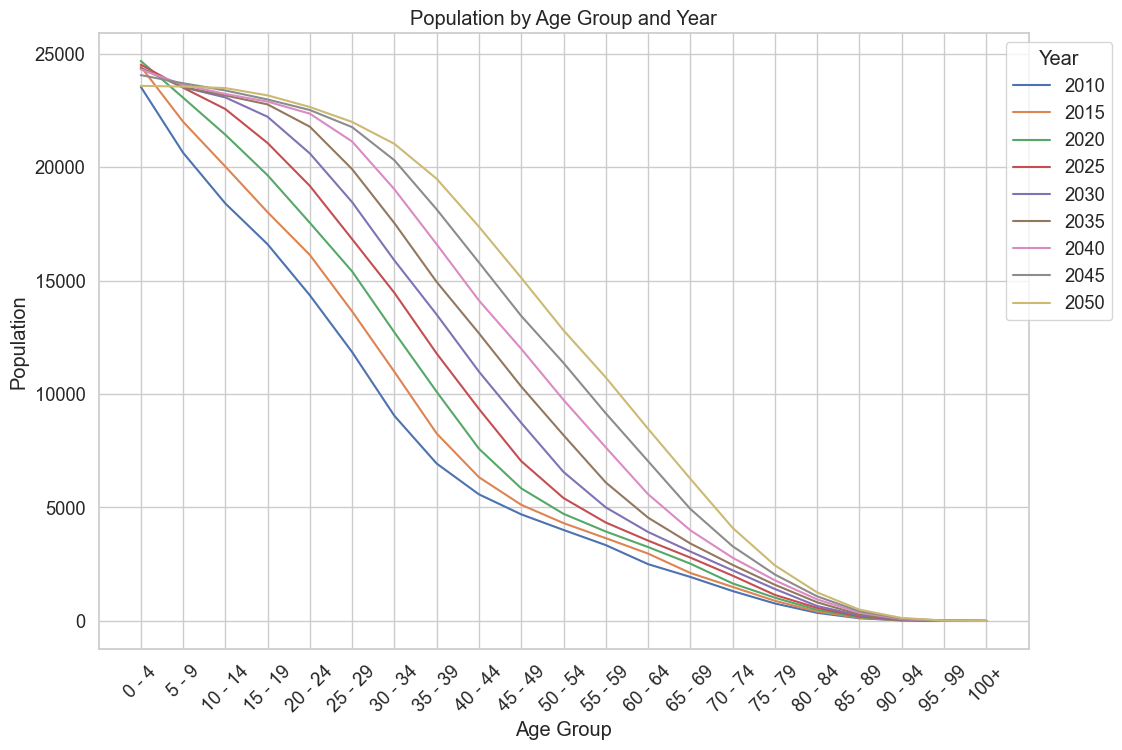

In [254]:
plot_population_by_age_group(both_2010)

In [226]:
category = both_1950.columns
category

Index(['0 - 4', '5 - 9', '10 - 14', '15 - 19', '20 - 24', '25 - 29', '30 - 34',
       '35 - 39', '40 - 44', '45 - 49', '50 - 54', '55 - 59', '60 - 64',
       '65 - 69', '70 - 74', '75 - 79', '80 - 84', '85 - 89', '90 - 94',
       '95 - 99', '100+'],
      dtype='object')

In [256]:
def get_survival_rate(dataset, start_year, end_year):
    # Convert dataset to numeric type
    dataset_numeric = dataset.apply(pd.to_numeric, errors='coerce')
    
    # Calculate survival rate
    survival_rate = pd.DataFrame(
        dataset_numeric.loc[end_year] / dataset_numeric.loc[start_year].shift(periods=1),
        columns=[end_year],
    ).drop('0 - 4').T
    
    return survival_rate


In [257]:
get_survival_rate(m_1950, 2000, 2005)

,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,50 - 54,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
2005,0.923413,0.970287,0.977295,0.965356,0.941807,0.919435,0.910912,0.911143,0.911586,0.907247,0.89537,0.870123,0.823646,0.749383,0.64346,0.504209,0.35148,0.215981,0.116909,0.056306


In [258]:
def plot_survival_rate(dataset, title):
    plt.figure(figsize=(16, 7))
    for year in dataset.index[-4:-1]:
        plt.plot(get_survival_rate(dataset, year, year + 5).T, label=f'{year}')
    plt.title(title)
    plt.xlabel('Age Groups')
    plt.ylabel('Survival Rate')
    plt.legend()
    plt.show()


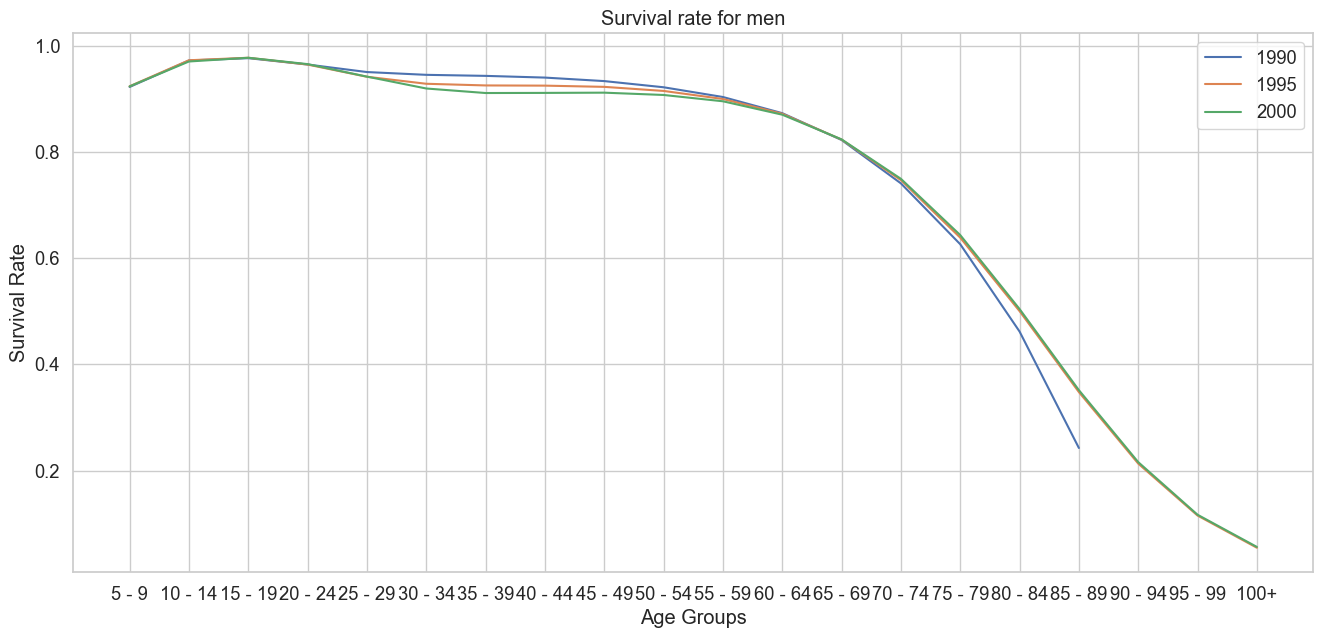

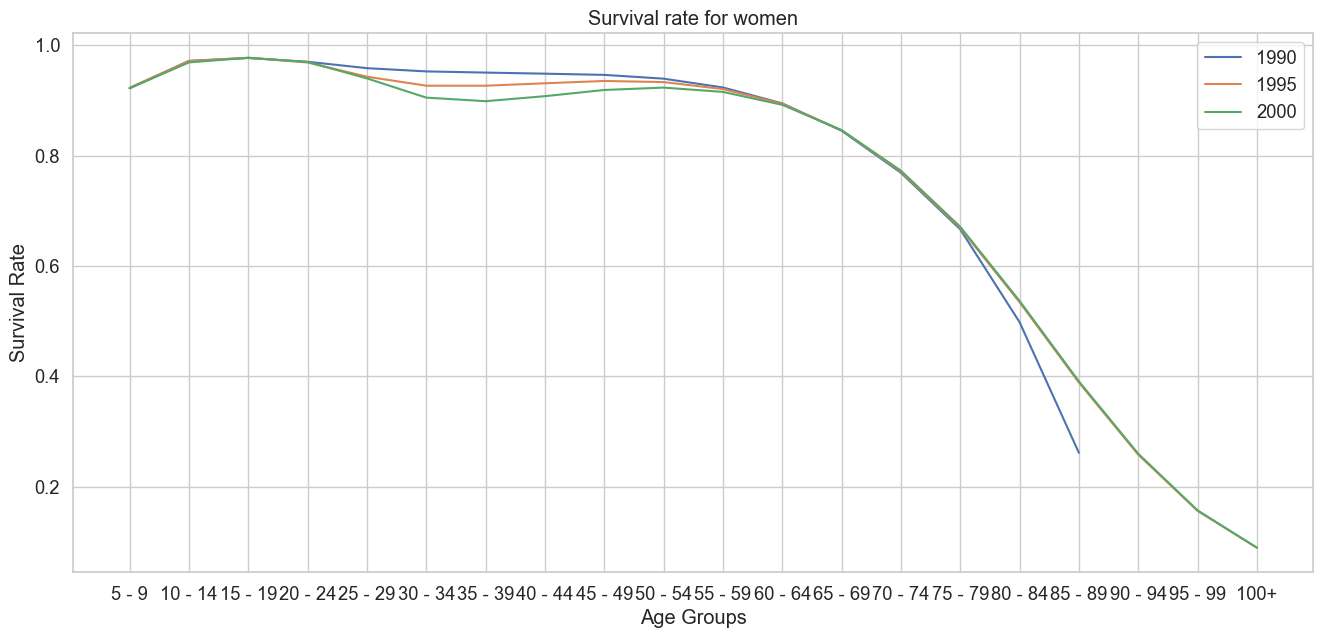

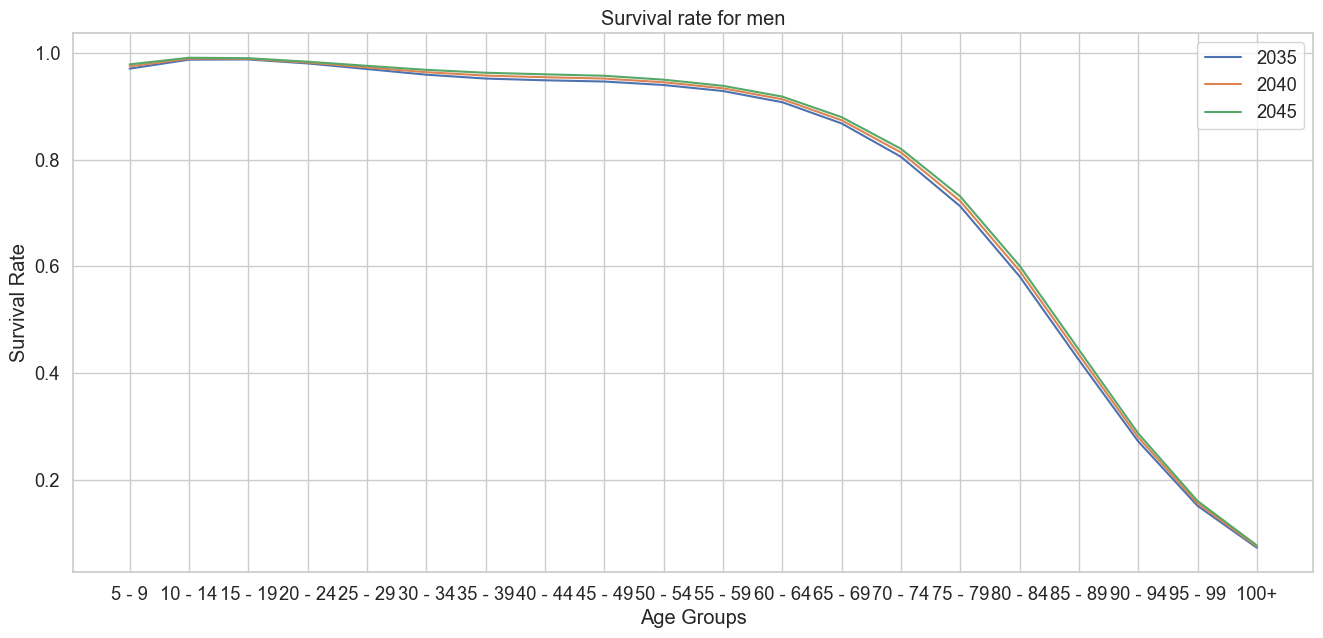

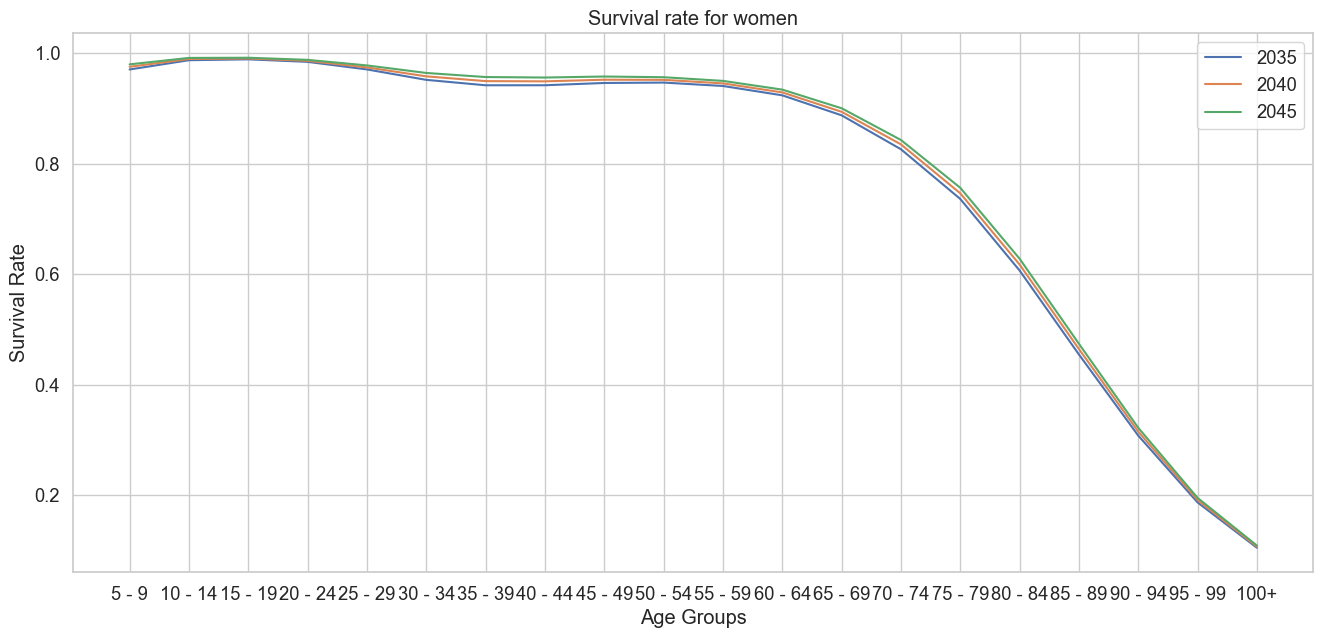

In [259]:
plot_survival_rate(m_1950, 'Survival rate for men')
plot_survival_rate(f_1950, 'Survival rate for women')

plot_survival_rate(m_2010, 'Survival rate for men')
plot_survival_rate(f_2010, 'Survival rate for women')


In [231]:
def get_fertility_rate(both_dataset, female_dataset, year=2005):
    numerator = both_dataset.loc[year, '0 - 4']
    denominator = female_dataset.loc[year, ['15 - 19', '20 - 24', '25 - 29', '30 - 34', '35 - 39']].sum()
    return numerator / denominator


In [261]:
get_fertility_rate(both_1950, f_1950)

0.8887592888736688

In [262]:
def get_boy_prob(male_dataset, both_dataset, age_group):
    """
    Calculate the probability of having a boy.
    
    Parameters:
    male_dataset (pd.DataFrame): The male population dataset
    both_dataset (pd.DataFrame): The combined population dataset
    age_group (str): The age group to use for calculating the probability

    Returns:
    float: The probability of having a boy
    """
    return (male_dataset.loc[:, age_group] / both_dataset.loc[:, age_group]).mean(axis=0)


In [263]:
boy_probability = get_boy_prob(m_1950, both_1950, '0 - 4')
boy_probability

0.5085709812734157

In [268]:
def predict_population(male_dataset, female_dataset, both_dataset, survival_rate, fertility, boy_prob, girl_prob, start_year, num_years):
    """
    Predict population for a given number of years based on provided datasets, survival rate, fertility, and gender probabilities.
    
    Parameters:
    male_dataset (pd.DataFrame): The male population dataset
    female_dataset (pd.DataFrame): The female population dataset
    both_dataset (pd.DataFrame): The combined population dataset
    survival_rate (pd.Series): The survival rates for each age group
    fertility (float): The fertility rate
    boy_prob (float): The probability of having a boy
    girl_prob (float): The probability of having a girl
    start_year (int): The starting year of the prediction
    num_years (int): The number of years to predict

    Returns:
    pd.DataFrame: The updated combined population dataset
    """
    years = [start_year + i * 5 for i in range(num_years)]
    age_groups = both_dataset.columns
    relevant_age_groups = age_groups[1:6]

    # Make copies of the input DataFrames to prevent modifying the originals
    male_dataset = male_dataset.copy()
    female_dataset = female_dataset.copy()
    both_dataset = both_dataset.copy()

    for i in range(len(years) - 1):
        new_year = years[i + 1]

        # Predict female population
        f_0 = fertility * female_dataset.loc[years[i], relevant_age_groups].sum() * girl_prob
        f_1 = survival_rate * female_dataset.loc[years[i]].shift(periods=1)
        female_dataset.loc[new_year, age_groups[0]] = f_0
        female_dataset.loc[new_year, age_groups[1:]] = f_1

        # Predict male population
        m_0 = fertility * male_dataset.loc[years[i], relevant_age_groups].sum() * boy_prob
        m_1 = survival_rate * male_dataset.loc[years[i]].shift(periods=1)
        male_dataset.loc[new_year, age_groups[0]] = m_0
        male_dataset.loc[new_year, age_groups[1:]] = m_1

        # Update combined population dataset
        both_dataset.loc[new_year] = female_dataset.loc[new_year] + male_dataset.loc[new_year]

    return both_dataset


In [269]:
# Model's parameters
survival_rate = get_survival_rate(both_1950, 2000, 2005).loc[2005]
fertility = get_fertility_rate(both_1950, f_1950)
boy_probability = get_boy_prob(m_1950, both_1950, '0 - 4')
girl_probability = 1 - boy_probability

# Predict population
predicted_both_1950_to_2050 = predict_population(
    m_1950, f_1950, both_1950, survival_rate, fertility, boy_probability, girl_probability, 2005, 10
)


In [272]:
both_2010

,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,...,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
Year,,,,,,,,,,,,,,,,,,,,,
2010,23536.254,20633.118,18395.553,16597.754,14347.946,11846.544,9038.291,6934.571,5577.907,4696.548,...,3342.206,2503.389,1939.419,1318.804,770.248,357.493,117.686,24.590,2.779,0.179
2015,24428.869,21998.541,20021.189,18011.296,16126.140,13638.176,10978.002,8258.943,6333.158,5118.582,...,3647.454,2967.799,2114.100,1500.455,888.825,415.272,139.253,29.897,3.701,0.233
2020,24673.591,23058.194,21424.168,19638.222,17541.559,15401.009,12714.093,10097.222,7589.279,5841.821,...,3940.975,3257.035,2525.066,1653.889,1025.672,488.853,165.907,36.399,4.625,0.317
2025,24509.168,23495.548,22555.217,21057.531,19168.382,16822.522,14455.475,11782.313,9341.973,7042.013,...,4336.778,3540.486,2791.960,1996.838,1148.702,575.657,200.394,44.662,5.796,0.407
2030,24367.633,23513.987,23067.754,22213.710,20599.241,18452.632,15884.319,13499.509,10985.188,8728.031,...,5003.669,3921.136,3059.206,2231.112,1407.797,657.988,242.085,55.542,7.321,0.523
2035,24347.619,23520.879,23155.074,22758.671,21775.610,19906.818,17526.325,14936.451,12674.316,10328.996,...,6101.757,4552.908,3414.381,2470.606,1594.922,822.199,283.630,68.977,9.359,0.674
2040,24300.004,23626.174,23219.651,22880.340,22351.527,21123.530,19019.131,16596.429,14119.466,11991.209,...,7648.023,5585.194,3994.976,2785.644,1790.783,948.744,362.703,82.983,11.925,0.880
2045,24050.173,23691.277,23372.684,22976.137,22511.317,21757.451,20297.952,18133.854,15794.514,13439.022,...,9148.228,7041.895,4934.898,3292.341,2046.259,1083.957,427.780,108.755,14.703,1.142
2050,23574.447,23545.714,23479.061,23156.310,22644.040,21986.103,21021.099,19481.162,17369.229,15120.213,...,10729.652,8468.845,6265.069,4103.008,2448.580,1258.645,498.713,131.186,19.693,1.436


In [271]:
predicted_both_1950_to_2050

,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,...,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
Year,,,,,,,,,,,,,,,,,,,,,
1950,5476.400000,4397.150000,3796.060000,3295.530000,2865.020000,2487.200000,2132.720000,1780.730000,1512.020000,1280.870000,...,929.330000,695.710000,478.200000,291.570000,145.480000,64.321000,-,-,-,-
1955,6559.498000,4754.909000,4194.862000,3661.738000,3159.712000,2724.308000,2352.728000,2002.973000,1656.819000,1392.329000,...,1006.190000,782.447000,542.635000,328.302000,164.969000,74.194000,-,-,-,-
1960,7357.623000,5747.280000,4548.898000,4054.385000,3518.213000,3012.049000,2584.238000,2216.730000,1870.450000,1531.905000,...,1030.968000,853.585000,616.629000,378.263000,189.975000,86.622000,-,-,-,-
1965,8265.085000,6505.304000,5513.648000,4405.160000,3903.564000,3362.051000,2865.086000,2442.711000,2077.706000,1736.467000,...,1132.129000,881.370000,679.717000,436.450000,223.809000,102.843000,-,-,-,-
1970,9345.081000,7372.673000,6256.337000,5346.122000,4243.926000,3732.656000,3200.579000,2712.765000,2296.034000,1935.509000,...,1258.030000,975.244000,709.365000,488.647000,264.149000,124.539000,-,-,-,-
1975,10707.805000,8413.879000,7111.894000,6079.904000,5164.039000,4070.445000,3565.468000,3041.835000,2560.281000,2148.486000,...,1440.130000,1092.219000,793.349000,518.050000,302.477000,152.055000,-,-,-,-
1980,12519.216000,9779.885000,8191.717000,7010.980000,6022.645000,5117.223000,4037.988000,3492.510000,2927.756000,2437.651000,...,1632.952000,1262.515000,899.011000,588.169000,327.368000,182.639000,-,-,-,-
1985,14819.258000,11403.398000,9442.258000,7928.146000,6699.557000,5695.283000,4814.619000,3793.661000,3283.937000,2736.233000,...,1830.837000,1434.358000,1044.219000,671.445000,375.074000,210.551000,-,-,-,-
1990,16900.950000,13618.560000,11070.038000,9214.166000,7681.095000,6440.670000,5455.668000,4595.850000,3602.269000,3096.619000,...,2057.544000,1616.561000,1193.830000,785.918000,432.673000,244.535000,-,-,-,-


In [273]:
def plot_comparison(predicted_dataset, un_dataset, year):
    """
    Plot a comparison graph between the predicted dataset and UN dataset for a specific year.

    Parameters:
    predicted_dataset (pd.DataFrame): The predicted population dataset
    un_dataset (pd.DataFrame): The UN population dataset
    year (int): The year for which the comparison should be plotted
    """
    plt.figure(figsize=(15, 7))
    plt.plot(predicted_dataset.loc[year], label='Prediction')
    plt.plot(un_dataset.loc[year], label='UN Forecast')
    plt.legend()
    plt.title(f'Comparison of Prediction and UN Forecast for {year}')
    plt.show()




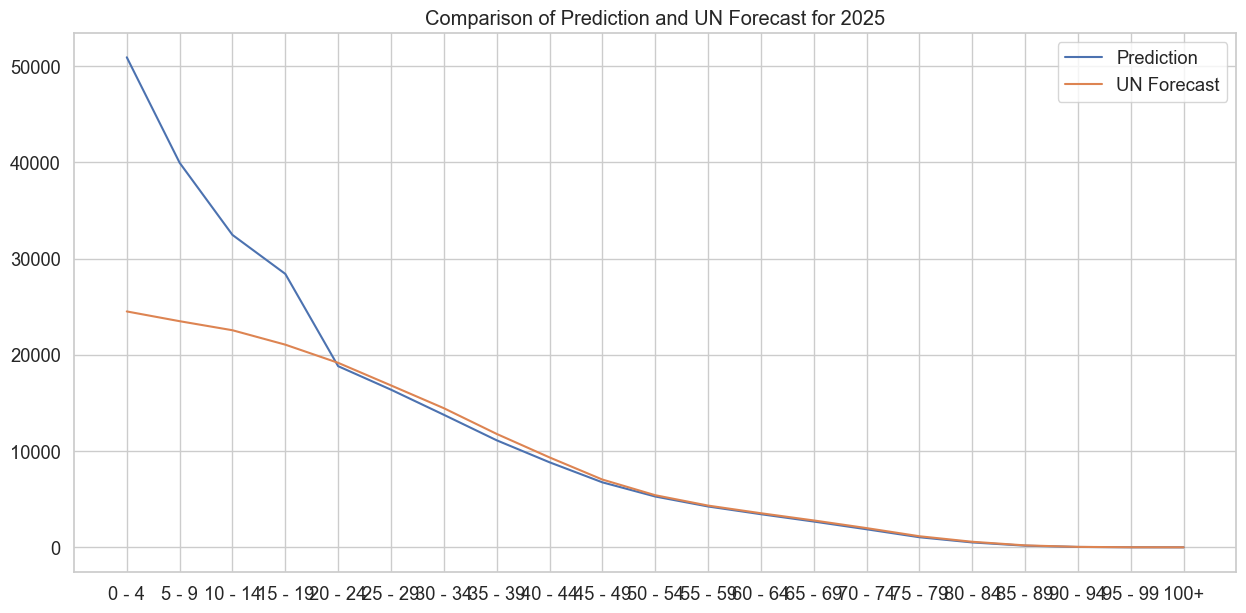

In [274]:
plot_comparison(predicted_both_1950_to_2050, both_2010, 2025)